# 統計関係のスニペット

## ライブラリインポート  
※未インストールの場合は、ノート上で !pip install numpy のようにインストールできる。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

## サンプルデータロード

In [2]:
df = pd.read_csv('data/modified_c4_epa_air_quality.csv')

In [3]:
df.head(5)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294


## データ確認

In [4]:
df.shape

(260, 8)

In [5]:
df.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
count,260,260,260,260,257,260,260,260.000000
unique,1,52,149,190,253,1,1,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN
freq,260,66,14,21,2,260,260,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.766921
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714716
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.098612
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.791759
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.302585


## 欠損値（N/A）確認

In [6]:
df.isna().sum()

date_local          0
state_name          0
county_name         0
city_name           0
local_site_name     3
parameter_name      0
units_of_measure    0
aqi_log             0
dtype: int64

→ local_site_name に3件の欠損値を確認

### 欠損値を含む行だけを表示

In [7]:
df[df.isna().any(axis=1)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
55,2018-01-01,West Virginia,Kanawha,Charleston,NaN,Carbon monoxide,Parts per million,1.386294
258,2018-01-01,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,2.302585


### local_site_name が NaN の場合、city_name の値を入れるようにする（axis=1）

In [8]:
df = df.fillna(method='ffill', axis=1)
df[df.isna().any(axis=1)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log


## ヒストグラム表示

<Axes: >

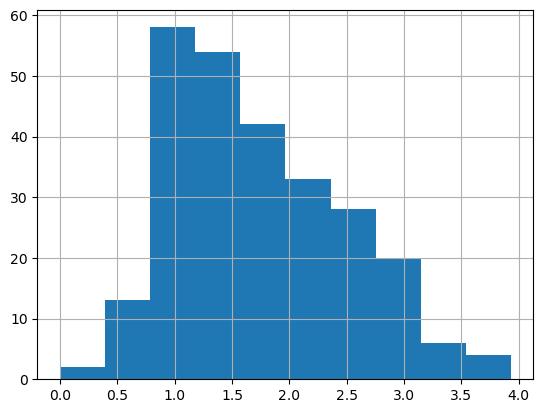

In [9]:
df['aqi_log'].hist()

## 記述統計

In [10]:
min_aqi_log = df['aqi_log'].min()
max_aqi_log = df['aqi_log'].max()
mean_aqi_log = df['aqi_log'].mean()
std_aqi_log = df['aqi_log'].std()

print('最小値', min_aqi_log)
print('最大値', max_aqi_log)
print('平均', mean_aqi_log)
print('標準偏差', std_aqi_log)

最小値 0.0
最大値 3.9318256327243257
平均 1.7669210929985577
標準偏差 0.7147155520223721


### Zスコア

In [11]:
df['z-score'] = stats.zscore(df['aqi_log'].astype('float'))
df.head(5)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z-score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584


In [12]:
lower_bound = mean_aqi_log - 1 * std_aqi_log
upper_bound = mean_aqi_log + 1 * std_aqi_log

print(((df['aqi_log'] > upper_bound) | (df['aqi_log'] < lower_bound)).mean() * 100)

23.846153846153847


In [13]:
print(((df['z-score'] > 1) | (df['z-score'] < -1)).mean() * 100)
print(((df['z-score'] > 2) | (df['z-score'] < -2)).mean() * 100)
print(((df['z-score'] > 3) | (df['z-score'] < -3)).mean() * 100)

23.846153846153847
4.230769230769231
0.38461538461538464


In [14]:
df[(df['z-score'] > 3) | (df['z-score'] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z-score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886


## 州ごとの平均

In [15]:
df.groupby('state_name')['aqi_log'].mean()

state_name
Alabama                 1.098612
Alaska                  2.249905
Arizona                 2.445778
Arkansas                1.386294
California              2.413149
Colorado                1.767876
Connecticut              1.41574
Delaware                1.386294
District Of Columbia    1.242453
Florida                 1.782627
Georgia                 1.522261
Hawaii                  1.866141
Idaho                    2.32698
Illinois                1.381045
Indiana                 1.490944
Iowa                    1.059351
Kansas                  1.098612
Kentucky                1.098612
Louisiana                    0.0
Maine                   1.242453
Maryland                1.170533
Massachusetts           1.314374
Michigan                2.132079
Minnesota               1.122884
Mississippi             1.098612
Missouri                1.329661
Montana                 1.039721
Nebraska                2.047172
Nevada                  2.768652
New Hampshire           1.098612

## 2標本t検定

In [16]:
aqi_michigan = list(df[df['state_name'] == 'Michigan']['aqi_log'])
aqi_washington = list(df[df['state_name'] == 'Washington']['aqi_log'])
aqi_wyoming = list(df[df['state_name'] == 'Wyoming']['aqi_log'])

significance_level = 0.05  # 有意水準5%

print('ミシガン州とワシントン州')
ind_michigan_washington = stats.ttest_ind(a=aqi_michigan, b=aqi_washington, equal_var=False)
print(ind_michigan_washington)
if ind_michigan_washington.pvalue >= significance_level:
    print('有意差なし')
else:
    print('有意差あり')

print('ミシガン州とワイオミング州')
ind_michigan_wyoming = stats.ttest_ind(a=aqi_michigan, b=aqi_wyoming, equal_var=False)
print(ind_michigan_wyoming)
if ind_michigan_wyoming.pvalue >= significance_level:
    print('有意差なし')
else:
    print('有意差あり')

ミシガン州とワシントン州
Ttest_indResult(statistic=2.1401979026098106, pvalue=0.14599400174281096)
有意差なし
ミシガン州とワイオミング州
Ttest_indResult(statistic=5.733093159721206, pvalue=0.0005934990222768247)
有意差あり


## BOXプロット

<Axes: xlabel='state_name', ylabel='aqi_log'>

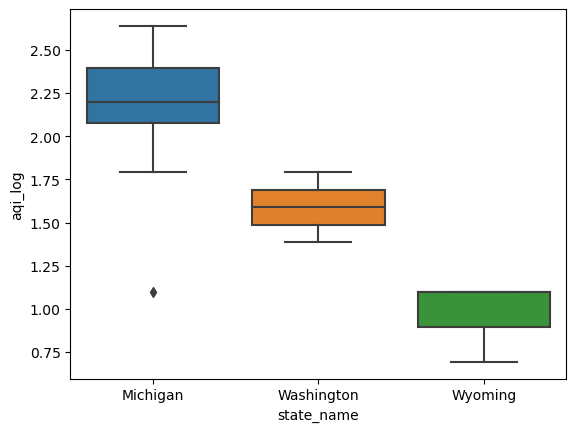

In [17]:
rre_states = ['Michigan','Washington','Wyoming']
aqi_rre = df[df['state_name'].isin(rre_states)]

sns.boxplot(x=aqi_rre["state_name"], y=aqi_rre["aqi_log"], order=rre_states)